In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

import json
from keras import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape, Permute
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.utils import plot_model

from keras_segmentation.models.segnet import vgg_segnet

Using TensorFlow backend.


# 1. Prep COCO Dataset 

In [2]:
dataDir='./COCO'
dataType='train2017'

trainImgs = "COCO/train2017/"
valImgs = "COCO/val2017/"

ckPtDir = "log/segnet"
plotDir = "log/plot"

segTrainOutDir = 'COCO/segTrain2017'
segValOutDir = 'COCO/segVal2017'

# 2. Load saved model's weights

In [3]:
model = vgg_segnet(n_classes=91, input_height=416, input_width=608, encoder_level=3)
model.load_weights(ckPtDir + "/vgg_segnet.499")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 416, 608, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 416, 608, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 416, 608, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 208, 304, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 208, 304, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 208, 304, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 104, 152, 128)     0   

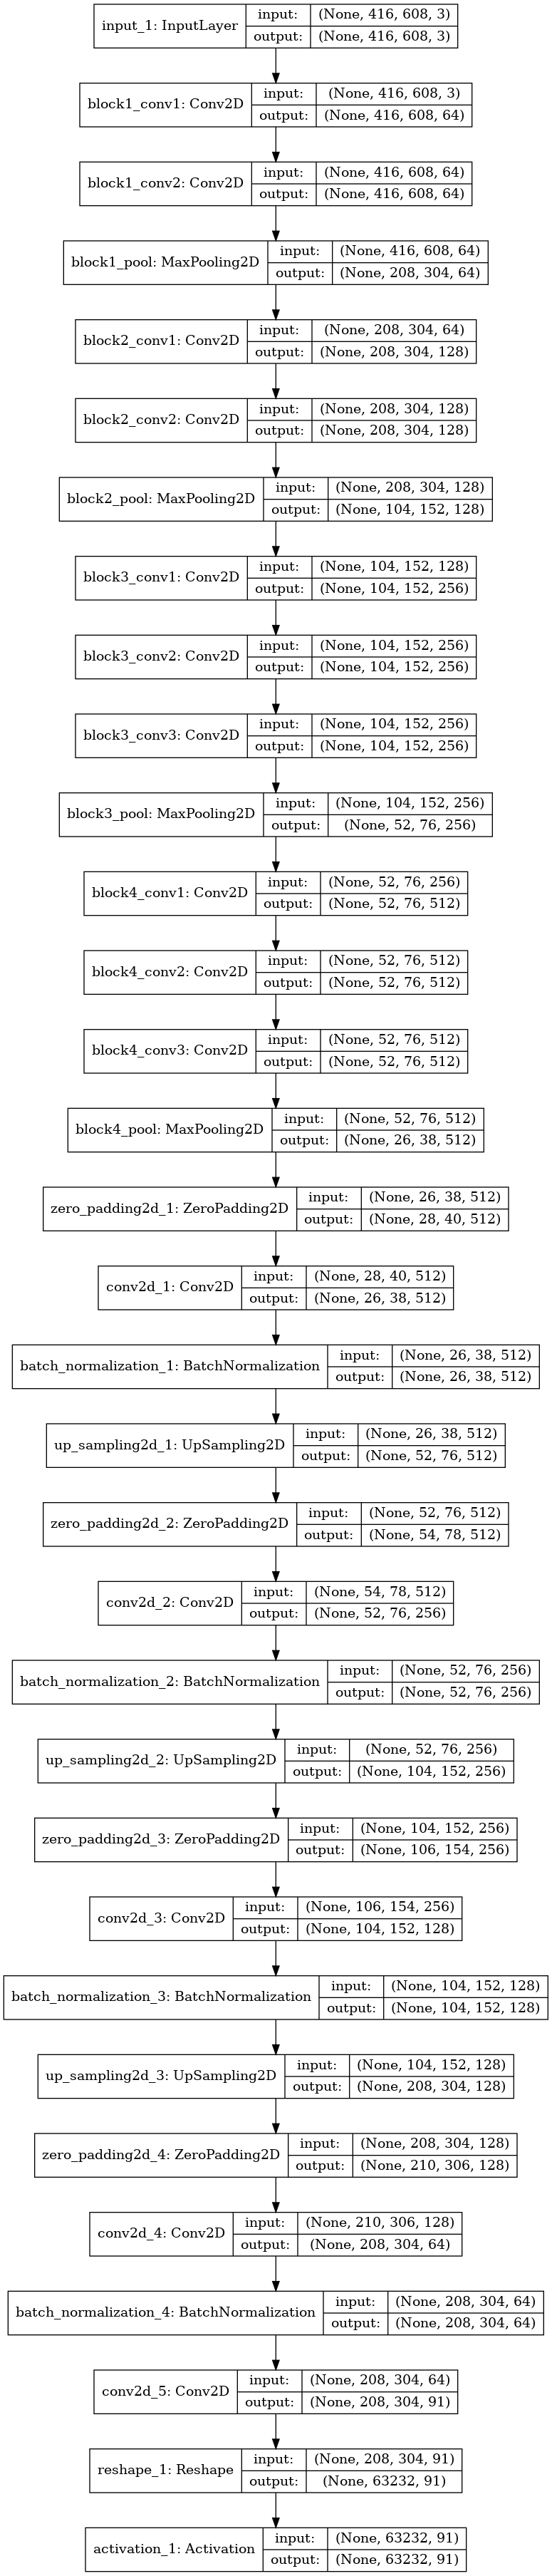

In [5]:
plot_model(model, show_shapes=True, to_file= plotDir + '/vgg_segnet.png')

# 3. Gernerate segmentation images

## 3.1 Generate segmentaion images (Train)

In [6]:
for (path, dirs, files) in os.walk(trainImgs):
    for filename in files:
        out = model.predict_segmentation(
            inp = path+filename,
            out_fname = segTrainOutDir + '/' + filename[:-3]+'png'
        )

KeyboardInterrupt: 

## 3.2 Generate segmentaion images (Val)

In [ ]:
for (path, dirs, files) in os.walk(valImgs):
    for filename in files:
        out = model.predict_segmentation(
            inp = path+filename,
            out_fname = segValOutDir + '/' + filename[:-3]+'png'
        )